In [128]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import scipy.fftpack as fft
import skimage.restoration as sires
import cv2 as cv
import rawpy as raw
from mpl_toolkits.mplot3d import Axes3D
from jupyterthemes import jtplot

In [176]:
jtplot.reset()
plt.switch_backend('nbAgg')
plt.style.use("bmh")
plt.rcParams["axes.axisbelow"] = True
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (16/2, 9/2)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["text.latex.preamble"] = [r"\usepackage{physics}", r"\usepackage{url}"]

In [18]:
def polarticks_4(value,tick_number):
    N = int(np.round(4*value/np.pi))
    if N == 0:
        return "0"
    elif N == -1:
        return r"$-\pi/4$"
    elif N == 1:
        return r"$\pi/4$"
    elif N == -2:
        return r"$-\pi/2$"
    elif N == 2:
        return r"$\pi/2$"
    elif N%2 < 0:
        return r"$-{0}\pi/4$".format(N)
    elif N%2 > 0 or N%2 < 0:
        return r"${0}\pi/4$".format(N)
    else:
        return r"${0}\pi$".format(N//4)
    
def polarticks_2(value,tick_number):
    N = int(np.round(2*value/np.pi))
    if N == 0:
        return "0"
    elif N == -1:
        return r"$-\pi/2$"
    elif N == 1:
        return r"$\pi/2$"
    elif N == -2:
        return r"$-\pi$"
    elif N == 2:
        return r"$\pi$"
    elif N%2 < 0:
        return r"$-{0}\pi/2$".format(N)
    elif N%2 > 0 or N%2 < 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N//2)
    
def polarticks_1(value,tick_number):
    N = int(np.round(value/np.pi))
    if N == 0:
        return "0"
    else:
        return r"${0}\pi$".format(N)

In [27]:
Lx, Ly = 1920, 1080
tx = np.linspace(0, 4*np.pi, 2*Lx)
ty = np.linspace(0, 4*np.pi, 2*Ly)
f = 10
X, Y = np.meshgrid(tx, ty)

def Z(X, theta, clip=None): 
    z = 1 + np.cos(2*np.pi*f*X + theta)
    z /= z.max()
    if clip is not None:
        z = (((z - z.min()) * (clip[1]/255 - clip[0]/255))/(z.max() - z.min())) + z.min()
    z = (z*255).astype('uint8')
    return z

for th in [0, np.pi/2, np.pi, 3/2*np.pi]:
    cv.imwrite('theta%s.png'%(str(int(np.degrees(th)))), Z(X, th))

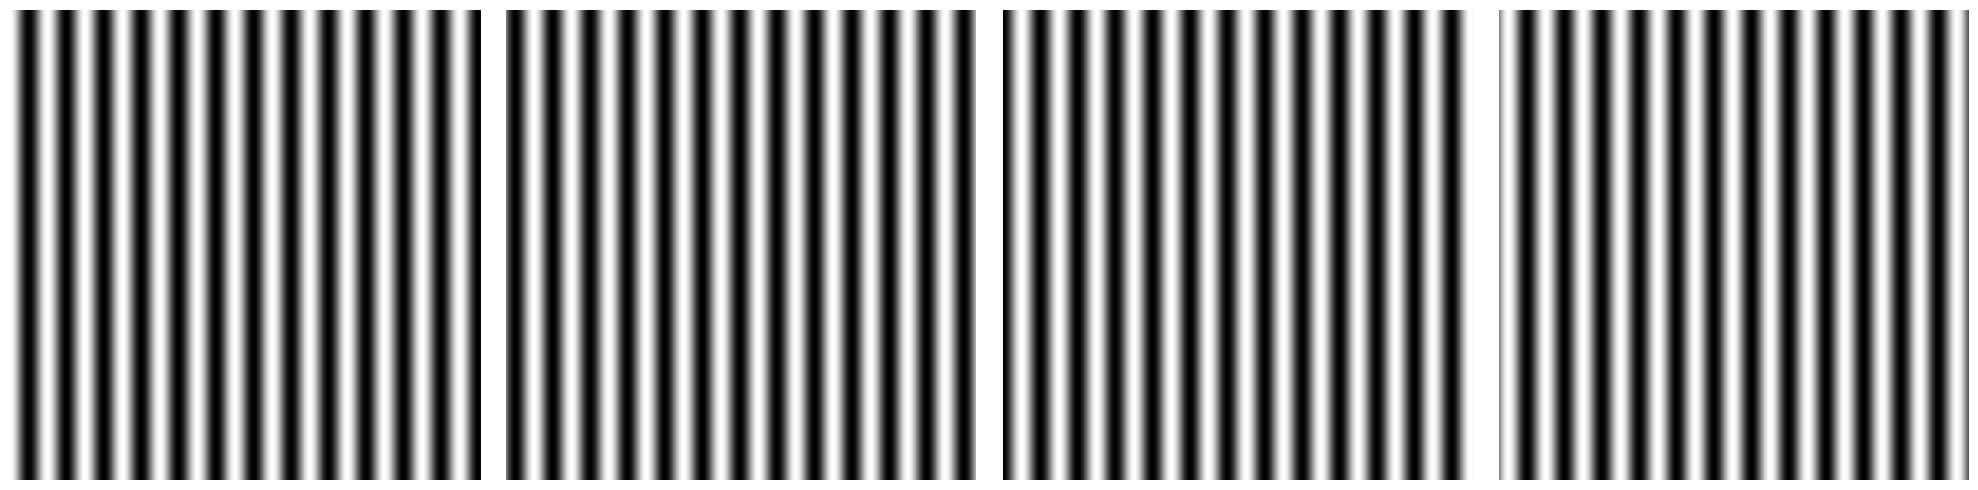

In [4]:
I1, I2, I3, I4 = Z(X, 0), Z(X, np.pi/2), \
                 Z(X, np.pi), Z(X, 3/2*np.pi)

fig, ax = plt.subplots(1, 4, figsize=(5*4, 5))
for i, im in enumerate([I1, I2, I3, I4]):
    ax[i].imshow(im, 'gray')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [39]:
ref = []
for f in range(7353, 7353+4):
    img_raw = raw.imread('RAW/_KVD%s.NEF'%(str(f)))
    img = img_raw.postprocess(output_bps=8, use_camera_wb=True)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ref.append(img)
ref = np.asarray(ref)

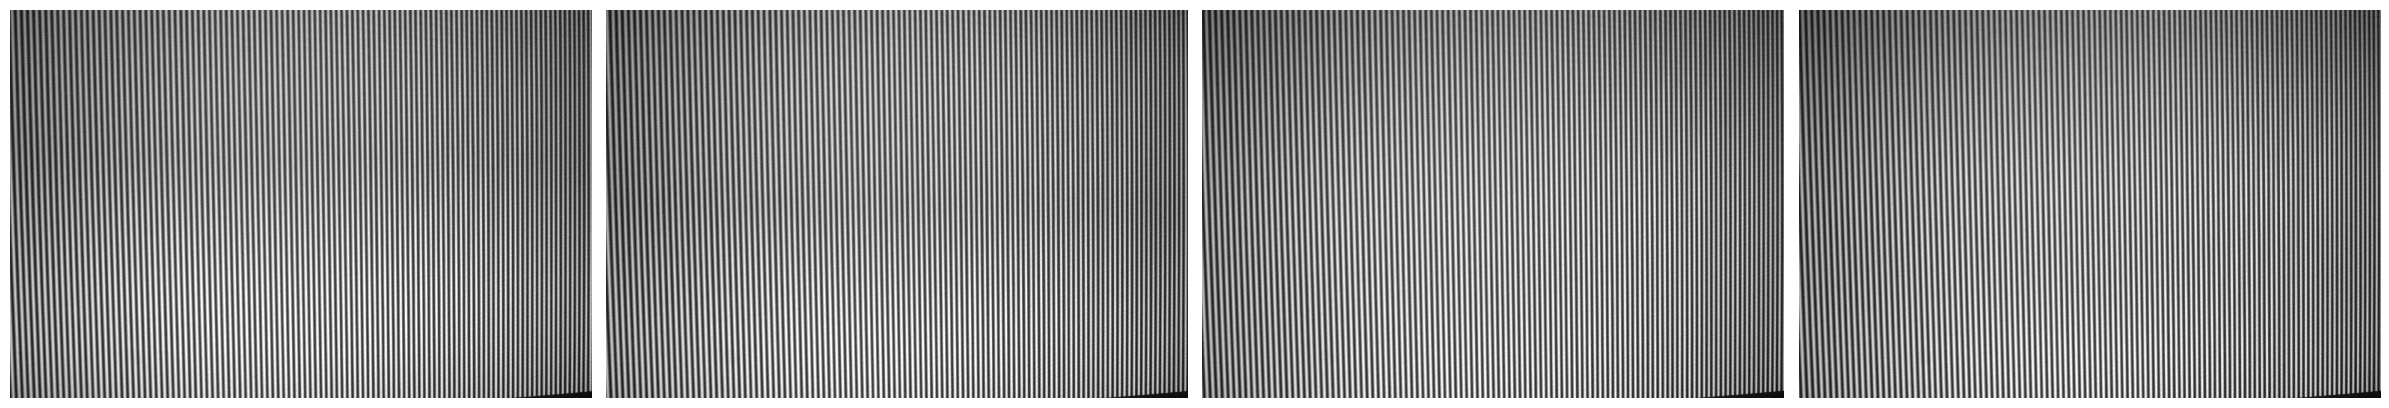

In [42]:
fig, ax = plt.subplots(1, 4, figsize=(16/2*3, 9/2))
for i in range(4):
    ax[i].imshow(ref[i], 'gray')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

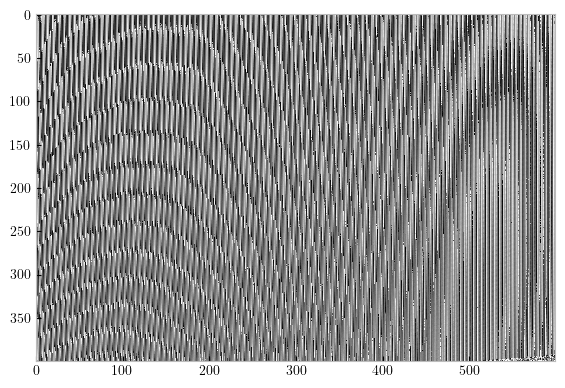

In [151]:
phi_ref = np.arctan2((ref[3] - ref[1]), (ref[0] - ref[2]), dtype=float)
unwrap_ref = np.unwrap(phi_ref % 2*np.pi, axis=1)

plt.imshow(cv.resize(phi_ref, (600, 400)), 'gray')
plt.grid(0)
plt.show()

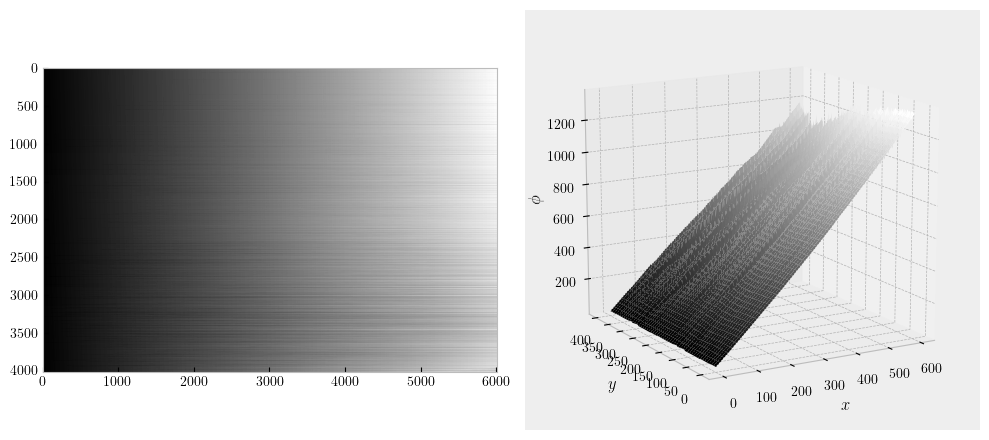

In [169]:
fig = plt.figure(figsize=(16/2*1.25, 9/2))

ax = fig.add_subplot(121)
ax.imshow(unwrap_ref, 'gray')
ax.grid(0)

ax = fig.add_subplot(122, projection='3d')
xx, yy = np.arange(600), np.arange(400)
X, Y = np.meshgrid(xx, yy)
ax.plot_surface(X, Y, cv.resize(unwrap_ref, (600, 400)), cmap='gray')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$\phi$')
ax.view_init(elev=15, azim=-120)

plt.tight_layout()
plt.show()

In [170]:
obj = []
for f in range(7372, 7372+4):
    img_raw = raw.imread('RAW/_KVD%s.NEF'%(str(f)))
    img = img_raw.postprocess(output_bps=8, use_camera_wb=True)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    obj.append(img)
obj = np.asarray(obj)

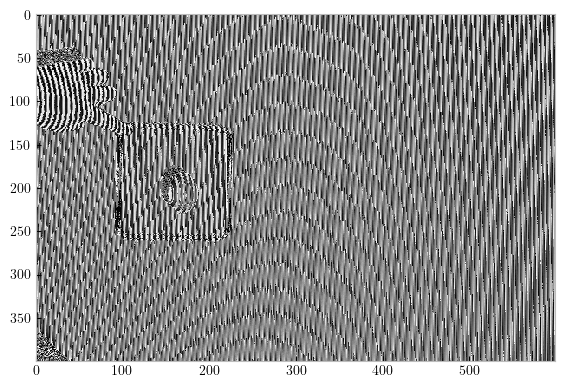

In [171]:
phi_obj = np.arctan2((obj[3] - obj[1]), (obj[0] - obj[2]), dtype=float)
unwrap_obj = np.unwrap(phi_obj % 2*np.pi, axis=1)

plt.imshow(cv.resize(phi_obj, (600, 400)), 'gray')
plt.grid(0)
plt.show()

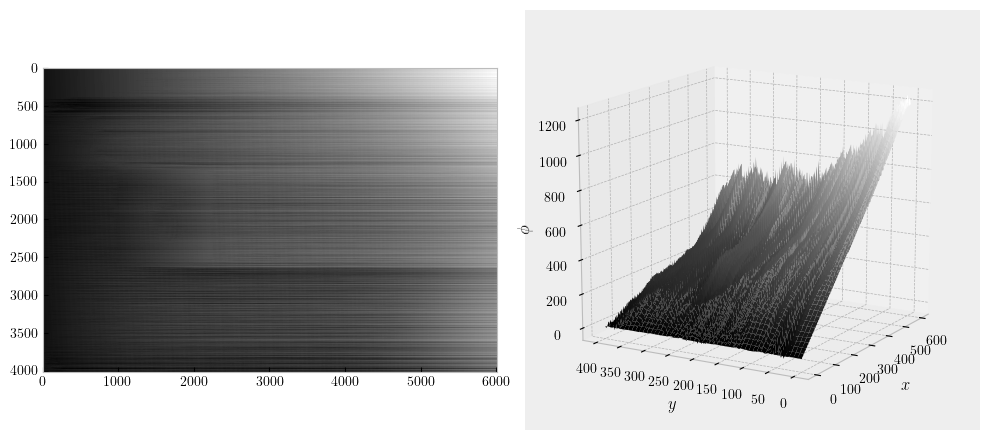

In [174]:
fig = plt.figure(figsize=(16/2*1.25, 9/2))

ax = fig.add_subplot(121)
ax.imshow(unwrap_obj, 'gray')
ax.grid(0)

ax = fig.add_subplot(122, projection='3d')
xx, yy = np.arange(600), np.arange(400)
X, Y = np.meshgrid(xx, yy)
ax.plot_surface(X, Y, cv.resize(unwrap_obj, (600, 400)), cmap='gray')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$\phi$')
ax.view_init(elev=15, azim=-150)

plt.tight_layout()
plt.show()

In [179]:
out = unwrap_obj - unwrap_ref

<IPython.core.display.Javascript object>


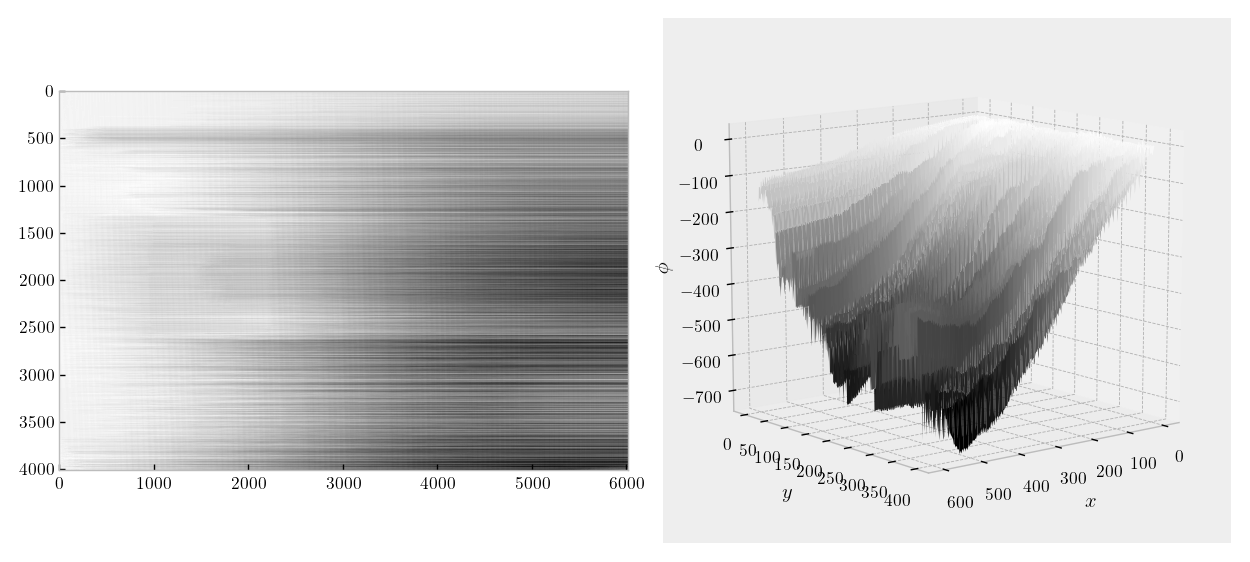

In [181]:
fig = plt.figure(figsize=(16/2*1.25, 9/2))

ax = fig.add_subplot(121)
ax.imshow(out, 'gray')
ax.grid(0)

ax = fig.add_subplot(122, projection='3d')
xx, yy = np.arange(600), np.arange(400)
X, Y = np.meshgrid(xx, yy)
ax.plot_surface(X, Y, cv.resize(out, (600, 400)), cmap='gray')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$\phi$')
ax.view_init(elev=15, azim=-150)

plt.tight_layout()
plt.show()